In [ ]:
pip install python-dotenv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer

import random
import numpy as np
import tensorflow as tf
import os




In [ ]:
df=pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29854 entries, 0 to 29853
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29854 non-null  object 
 1   dateAdded            29854 non-null  object 
 2   dateUpdated          29854 non-null  object 
 3   name                 29854 non-null  object 
 4   asins                29854 non-null  object 
 5   brand                29854 non-null  object 
 6   categories           29854 non-null  object 
 7   primaryCategories    29854 non-null  object 
 8   imageURLs            29854 non-null  object 
 9   keys                 29854 non-null  object 
 10  manufacturer         29854 non-null  object 
 11  manufacturerNumber   29854 non-null  object 
 12  reviews.date         29854 non-null  object 
 13  reviews.dateSeen     28676 non-null  object 
 14  reviews.didPurchase  1531 non-null   object 
 15  reviews.doRecommend  17608 non-null 

In [ ]:
print(df['categories'].value_counts())

categories
AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care                  8343
AA,AAA,Electronics Features,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care         3728
Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets                                                                                                                                                                                                                  2513
Fire Tablets,Tablets,All Tablets,Amazon Tablets,Genuine Tablet Accessories,Computers & Tablets,Electronics,Amazon                              

In [ ]:
print(df['reviews.rating'].value_counts())

reviews.rating
5    19897
4     6856
3     1403
1     1028
2      670
Name: count, dtype: int64


In [ ]:
def map_sentiment(rating):
  if rating==5 or rating==4:
    return 1 #'Positive'
  elif rating==1 or rating==2:
    return 0 #Negative'
  else: return 2 #'Neutral'


df['sentiment']=df['reviews.rating'].apply(map_sentiment)
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",2
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",1
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",1
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",1
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",1


In [ ]:
print(df['sentiment'].value_counts())

sentiment
1    26753
0     1698
2     1403
Name: count, dtype: int64


In [ ]:

# For each sentiment class, randomly sample 1400 rows to balance the dataset
# group_keys=False ensures the original index structure is not kept
df = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=1400, random_state=42)).reset_index(drop=True)

print(df['sentiment'].value_counts())



sentiment
0    1400
1    1400
2    1400
Name: count, dtype: int64


<ipython-input-11-21c0fce5ccf0>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=1400, random_state=42)).reset_index(drop=True)


In [ ]:

important_features = df[['reviews.text', 'reviews.title']]

label=df['sentiment']

train_features, test_features, train_labels, test_labels = train_test_split(
    important_features,
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

In [ ]:
import re

# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions (@username) and hashtags (#)
    text = re.sub(r"[^a-zA-Z']", ' ', text)  # Remove all non-letter characters except apostrophes
    return text

# Apply text cleaning to the 'reviews.text' column in training and test data
train_features['reviews.text'] = train_features['reviews.text'].apply(clean_text)
test_features['reviews.text'] = test_features['reviews.text'].apply(clean_text)


#Classification

In [ ]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Combine text and title columns into one string for train and test sets
train_texts = train_features['reviews.text'].astype(str).str.cat(train_features['reviews.title'].astype(str), sep=" ")
test_texts = test_features['reviews.text'].astype(str).str.cat(test_features['reviews.title'].astype(str), sep=" ")

# Tokenize the concatenated text with truncation and padding
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256, return_tensors="tf")
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256, return_tensors="tf")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Function to convert encodings and labels into TensorFlow dataset
def convert_to_tf_dataset(encodings, labels):
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),  # Convert encodings to dictionary
        tf.convert_to_tensor(labels)  # Convert labels to tensor
    ))
    return dataset

batch_size = 32

# Convert the data into TensorFlow datasets
train_dataset = convert_to_tf_dataset(train_encodings, train_labels).shuffle(1000).batch(batch_size)
test_dataset = convert_to_tf_dataset(test_encodings, test_labels).batch(batch_size)


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,1400
1,1400
2,1400


In [ ]:
from transformers import TFBertForSequenceClassification, BertConfig, create_optimizer

# Define the BERT configuration and model
config = BertConfig.from_pretrained("bert-base-uncased", num_labels=3, hidden_dropout_prob=0.3)
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", config=config)

# Set up training parameters
batch_size = 32
epochs = 10
num_train_steps = len(train_dataset) * epochs

# Create optimizer
optimizer, schedule = create_optimizer(init_lr=3e-5, num_warmup_steps=0, num_train_steps=num_train_steps)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs
)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
105/105 [==============================] - 66s 255ms/step - loss: 0.8276 - accuracy: 0.6086 - val_loss: 0.5614 - val_accuracy: 0.7690
Epoch 2/10
105/105 [==============================] - 23s 219ms/step - loss: 0.5103 - accuracy: 0.7979 - val_loss: 0.3895 - val_accuracy: 0.8512
Epoch 3/10
105/105 [==============================] - 22s 213ms/step - loss: 0.3520 - accuracy: 0.8705 - val_loss: 0.3373 - val_accuracy: 0.8679
Epoch 4/10
105/105 [==============================] - 22s 211ms/step - loss: 0.2784 - accuracy: 0.9042 - val_loss: 0.3070 - val_accuracy: 0.8857
Epoch 5/10
105/105 [==============================] - 22s 209ms/step - loss: 0.2017 - accuracy: 0.9318 - val_loss: 0.2880 - val_accuracy: 0.9012
Epoch 6/10
105/105 [==============================] - 22s 209ms/step - loss: 0.1522 - accuracy: 0.9458 - val_loss: 0.2981 - val_accuracy: 0.8917
Epoch 7/10
105/105 [==============================] - 22s 208ms/step - loss: 0.1232 - accuracy: 0.9646 - val_loss: 0.2970 - val_ac

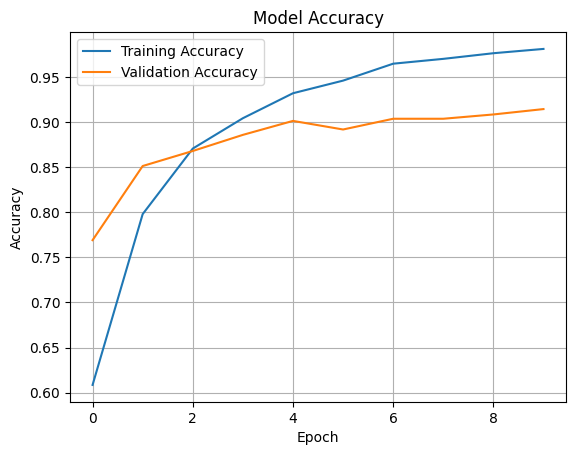

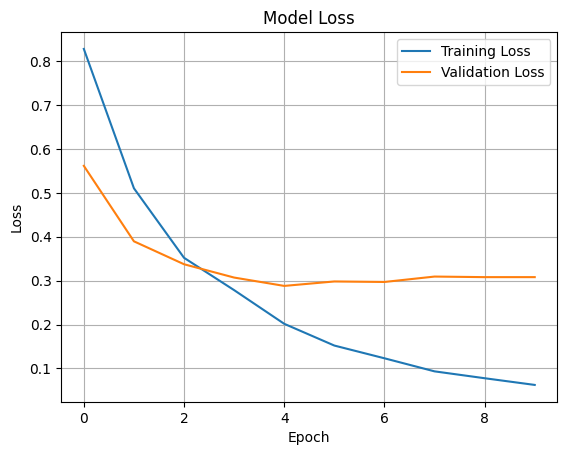

In [ ]:
import matplotlib.pyplot as plt

# رسم منحنى الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# رسم منحنى الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


27/27 [==============================] - 5s 69ms/step


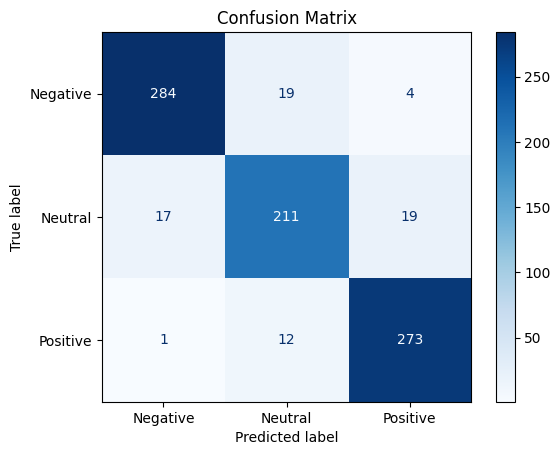

In [ ]:
import numpy as np

predictions = model.predict(test_dataset).logits

predicted_labels = np.argmax(predictions, axis=1)

true_labels = []
for _, label in test_dataset:
    true_labels.extend(label.numpy())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 2, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [ ]:
model.save_pretrained('saved_model_directory')
tokenizer.save_pretrained('saved_model_directory')


('saved_model_directory/tokenizer_config.json',
 'saved_model_directory/special_tokens_map.json',
 'saved_model_directory/vocab.txt',
 'saved_model_directory/added_tokens.json')

#Summarization

Using Transformers

In [ ]:
import pandas as pd
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Initialize a dictionary for category summaries
category_summaries = {}

for category in df['category_group'].unique():
    sub_df = df[df['category_group'] == category]

    # Get top 3 products based on sentiment
    top_products = sub_df.groupby('name')['sentiment'].mean().sort_values(ascending=False).head(3).index.tolist()
    worst_product = sub_df.groupby('name')['sentiment'].mean().sort_values().index[0]

    article = f"\n1- Category: {category}\n\n"
    article += "2- Top 3 Products:\n " + "\n ".join(top_products) + "\n\n"

    for product in top_products:
        reviews = sub_df[sub_df['name'] == product]['reviews.text'].dropna().tolist()
        text = " ".join(reviews)[:3000]

        summary = summarizer(text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
        article += f"3- {product} Summary:\n {summary}\n\n"

        # Handle complaints
        complaints = sub_df[(sub_df['name'] == product) & (sub_df['sentiment'] <= 2)]['reviews.text'].dropna().tolist()
        complaints_text = " ".join(complaints)[:3000]

        if complaints:
            complaint_summary = summarizer(complaints_text, max_length=100, min_length=50, do_sample=False)[0]['summary_text']

    # Summarize the worst product
    worst_reviews = sub_df[sub_df['name'] == worst_product]['reviews.text'].dropna().tolist()
    worst_text = " ".join(worst_reviews)[:3000]

    worst_summary = summarizer(worst_text, max_length=100, min_length=50, do_sample=False)[0]['summary_text']

    article += f"\n4- Worst Product:\n {worst_product}\n\n5- Why to avoid it:\n {worst_summary}\n"

    category_summaries[category] = article

# Print summary for specific categories
print('------------------------------------------------------------------')
print(category_summaries['Tablets & Ebook Readers'])
print('------------------------------------------------------------------')
print('\n\n'+category_summaries['Batteries & Small Electronics'])
print('------------------------------------------------------------------')
print('\n\n'+category_summaries['Amazon Tablets'])
print('------------------------------------------------------------------')
print('\n\n'+category_summaries['Smart Home & Audio Devices'])
print('------------------------------------------------------------------')


Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 100, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 150, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 100, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('.

------------------------------------------------------------------

1- Category: Tablets & Ebook Readers

2- Top 3 Products:
 AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
 AmazonBasics AAA Performance Alkaline Batteries (36 Count)

3- AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary Summary:
 Batteries don't last long even in tv remite you arelucky to get a week out of them. Energizer s last a year usually. Don't wasteyour money. bought these batteries because the duracell batteries tend to leak. The acid left a 2 stain on my table.

3- AmazonBasics AAA Performance Alkaline Batteries (36 Count) Summary:
 Bought two packs of these on subscribe and save in. Started leaking shortly after reciept. Will not purchase again. took WAY to long to receive and then some were corroded. Batteries were weak and didn't last a week in remote I am disappointed with the quality of these batteries.


4- Worst Product:
 AmazonBasics AAA Perfo

In [ ]:
for category in df['category_group'].unique():
    sub_df = df[df['category_group'] == category]
    print(category, "->", sub_df['name'].nunique(), "unique products")


Tablets & Ebook Readers -> 2 unique products
Batteries & Small Electronics -> 26 unique products
Smart Home & Audio Devices -> 25 unique products
Amazon Tablets -> 6 unique products


Using OpenAI

In [ ]:
import pandas as pd
import openai
import os
from dotenv import load_dotenv, find_dotenv

# Load environment variables from the .env file
_ = load_dotenv(find_dotenv())
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

# Initialize OpenAI client with the API key
openai.api_key = OPENAI_API_KEY

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response['choices'][0]['message']['content']

# Create a dictionary to store the summaries for each category
category_summaries = {}

for category in df['category_group'].unique():
    sub_df = df[df['category_group'] == category]

    # Get top 3 products based on sentiment scores
    top_products = sub_df.groupby('name')['sentiment'].mean().sort_values(ascending=False).head(3).index.tolist()
    worst_product = sub_df.groupby('name')['sentiment'].mean().sort_values().index[0]

    prompt = f"""
You are a helpful assistant. Write a short blog-style article recommending top products in the category '{category}' based on real customer reviews.
Do it like this:

1- Category:
2- Top 3 Products:
3- Summary:
4- Worst Product:
5- Why to avoid it:

"""
    for i, product in enumerate(top_products, 1):
        reviews = sub_df[sub_df['name'] == product]['reviews.text'].dropna().tolist()
        review_sample = " ".join(reviews[:5])  # Taking the first 5 reviews
        prompt += f"\n{i}. {product}\nReviews: {review_sample}\n"

    prompt += f"\n\n2. Worst Product: {worst_product}\n"
    worst_reviews = sub_df[sub_df['name'] == worst_product]['reviews.text'].dropna().tolist()
    prompt += "Reviews: " + " ".join(worst_reviews[:5]) + "\n"

    prompt += "\nWrite a clear and informative article summarizing the differences between the top 3 products, Top complaints for each of those products, and why the worst product should be avoided.\n"

    summary = get_completion(prompt)
    category_summaries[category] = summary


In [ ]:
for cat, article in category_summaries.items():
    print(f"================= {cat} =================\n")
    print(article)
    print("\n\n")


================= Tablets & Ebook Readers =================

Category: Batteries

Top 3 Products:
1. AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
2. AmazonBasics AAA Performance Alkaline Batteries (36 Count)
3. AmazonBasics AAA Performance Alkaline Batteries (36 Count)

Summary:
Based on real customer reviews, the top 3 products in the batteries category are all from AmazonBasics. The AA batteries have received positive feedback for their performance and longevity, while the AAA batteries have been criticized for being low charged and not lasting long. The AA batteries are recommended for their reliability and value for money.

Worst Product:
AmazonBasics AAA Performance Alkaline Batteries (36 Count)

Why to avoid it:
The AmazonBasics AAA batteries have been consistently rated poorly by customers for their low charge, short lifespan, and overall poor performance. Many users have reported that the batteries die quickly and do not work straight out of th